# Diamonds
##### data from Datazar.com

This is a playground for testing my skills in machine learning with a simple dataset provided by Datazar.com. The data features a list of diamond purchase information, specifically the carat, color, clarity, and depth associated with the sale of diamond.

### Bring in the data!

In [1]:
import pandas as pd

In [2]:
file = "diamonds.csv"
df = pd.read_csv(file, index_col=0)
df = df.drop(['PricePerCt'], axis=1)
df.tail()

,Carat,Color,Clarity,Depth,TotalPrice
347,0.80,H,VVS2,69.9,2916.0
348,0.97,G,VVS1,70.0,5021.9
349,1.25,G,VS2,71.9,7009.9
350,1.52,F,VS1,70.4,11604.1
351,1.72,G,VS1,69.1,13899.5


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Distributions: what does it look like? 

It is really nice to be able to see the data that is being worked with. In this case the bar charts are really useful for seeing a frequency breakdown. 

Text(0.5,1,'Distribution of Diamond Clarity')

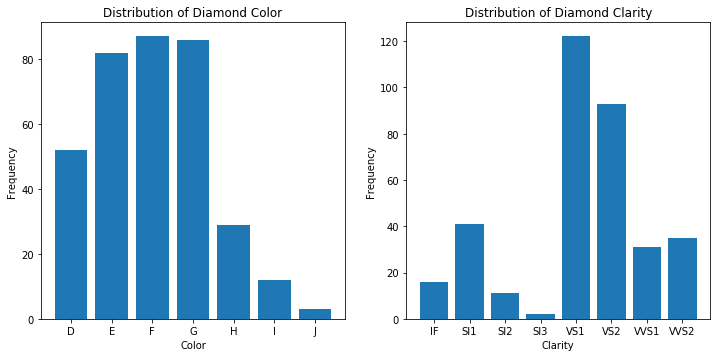

In [4]:
plt.figure(figsize=[12,12])

# Fourth subplot showing diamond color distribution
plt.subplot(221)
color_dist = df['Color'].value_counts(sort=True)
plt.bar(color_dist.keys(), color_dist)
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Color')

# Fifth subplot showing diamond Clarity distribution
plt.subplot(222)
clarity_dist = df['Clarity'].value_counts(sort=True)
plt.bar(clarity_dist.keys(), clarity_dist)
plt.xlabel('Clarity')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Clarity')

There are clear frontrunners when it comes to diamond clarity. Diamond color is a little more distributed.

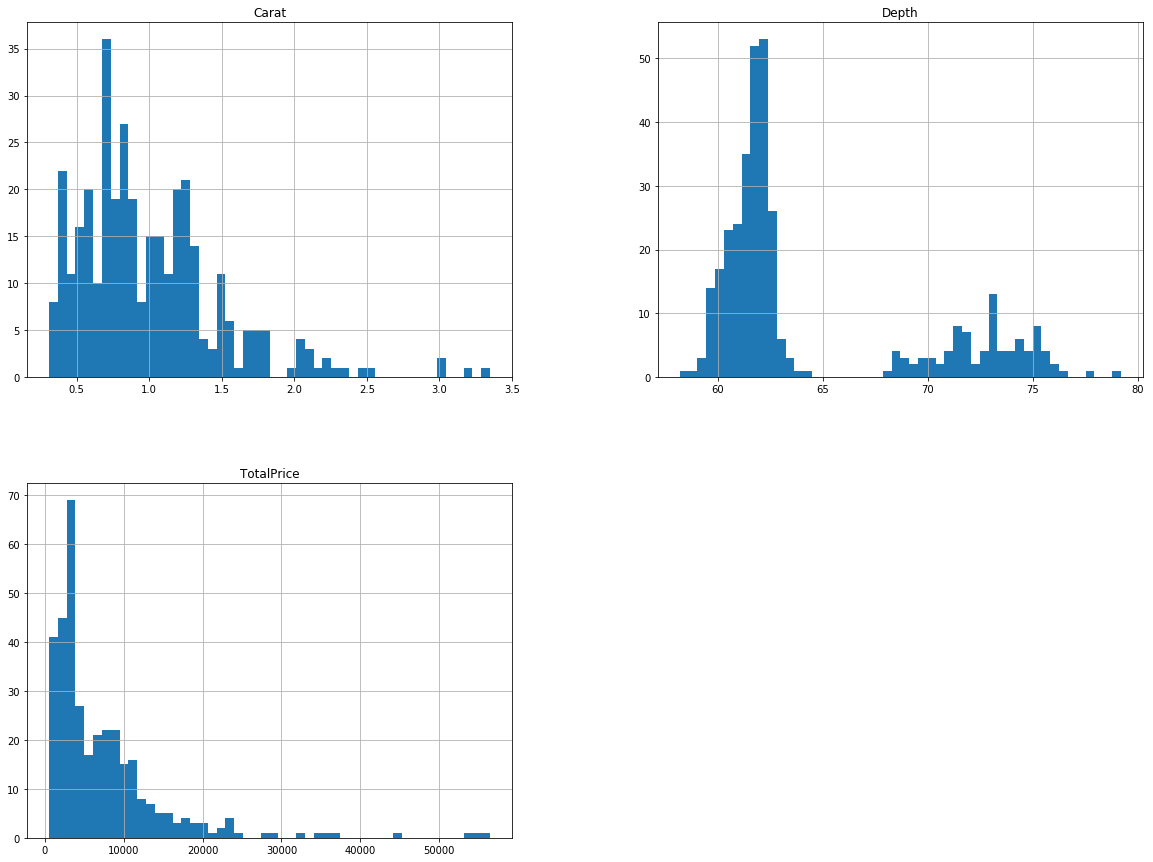

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In this dataset a majority of the diamonds are between 0.25 and 1.25 carats. Depth has an odd distribution while the total price is nearly hyperbolic (1/x).

### Clean it up: data worth learning.

The ML models do very well with numerical data, so something must be done with the categorical stuff. Color and clarity must be mapped to integers.

In [6]:
from sklearn import preprocessing
    
color_encoder = preprocessing.LabelEncoder()
color_encoder.fit(df['Color'])
df['Color'] = color_encoder.transform(df['Color'])

clarity_encoder = preprocessing.LabelEncoder()
clarity_encoder.fit(df['Clarity'])
df['Clarity'] = clarity_encoder.transform(df['Clarity'])

df.tail()

,Carat,Color,Clarity,Depth,TotalPrice
347,0.80,4,7,69.9,2916.0
348,0.97,3,6,70.0,5021.9
349,1.25,3,5,71.9,7009.9
350,1.52,2,4,70.4,11604.1
351,1.72,3,4,69.1,13899.5


### Trends: more visualization

Total price will be the goal to regress in the end. So, provided with a few datapoints we want this model to be accurate in predicting the cost of this diamond. Let's see some of the relationships between diamond properites and their total prices.

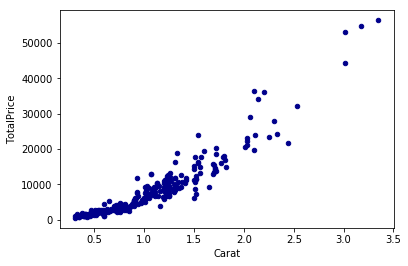

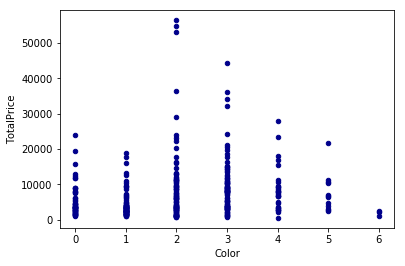

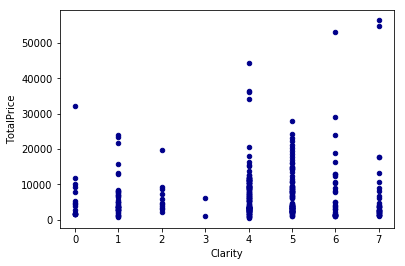

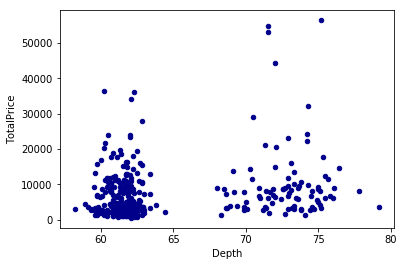

In [26]:
df.plot.scatter(x='Carat', y='TotalPrice', c='DarkBlue')
df.plot.scatter(x='Color', y='TotalPrice', c='DarkBlue')
df.plot.scatter(x='Clarity', y='TotalPrice', c='DarkBlue')
df.plot.scatter(x='Depth', y='TotalPrice', c='DarkBlue')

### Prepare for learning: splitting the data

To validate the data we must split it into different pieces. One set to learn the input (X), the other is the output we wish to learn (y). In this case, the output we are wanting to learn is the the total price for the diamond.

In [8]:
X = df.drop(['TotalPrice'], axis=1)
y = df['TotalPrice']

Following the I/O split we now split the data into training and testing data. This 70/30 split is to ensure that a trained model is accurate to some degree. Once the model has trained on the training set it will be tested for accuracy on the testing set.

## Learn! 
#### LinearRegression

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
y_pred = regressor.predict(X_test)
print('Linear regression score: ', regressor.score(X_test, y_test), '% accuracy, not bad!')

Linear regression score:  0.9034739567566044 % accuracy, not bad!


#### GradientBoostingRegressor

In [11]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [34]:
print('Gradient Boosting score: ', model.score(X_test, y_test), '% accuracy, AMAZING!')

Gradient Boosting score:  0.9762938503897078 % accuracy, AMAZING!


Out of curiosity lets see what characteristics of a diamond led to the best prediction of it's total price. Not so surprisingly it appears as though carat and clarity were the most important features!

In [28]:
feature_labels = df.columns
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} -> {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

Color -> 9.51%
Depth -> 16.27%
Clarity -> 20.04%
Carat -> 54.18%
